In [386]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits 
digits=load_digits

In [387]:
# Reading German Credit Data 
data = pd.read_csv(r"F:\Paython\python_class_practice\Pima.csv",index_col=0)
data.head()

,npreg,glu,bp,skin,bmi,ped,age,type
1,6,148,72,35,33.6,0.627,50,Yes
2,1,85,66,29,26.6,0.351,31,No
3,1,89,66,23,28.1,0.167,21,No
4,3,78,50,32,31.0,0.248,26,Yes
5,2,197,70,45,30.5,0.158,53,Yes


In [388]:
data.isnull().sum()

npreg    0
glu      0
bp       0
skin     0
bmi      0
ped      0
age      0
type     0
dtype: int64

In [389]:
data.shape

(332, 8)

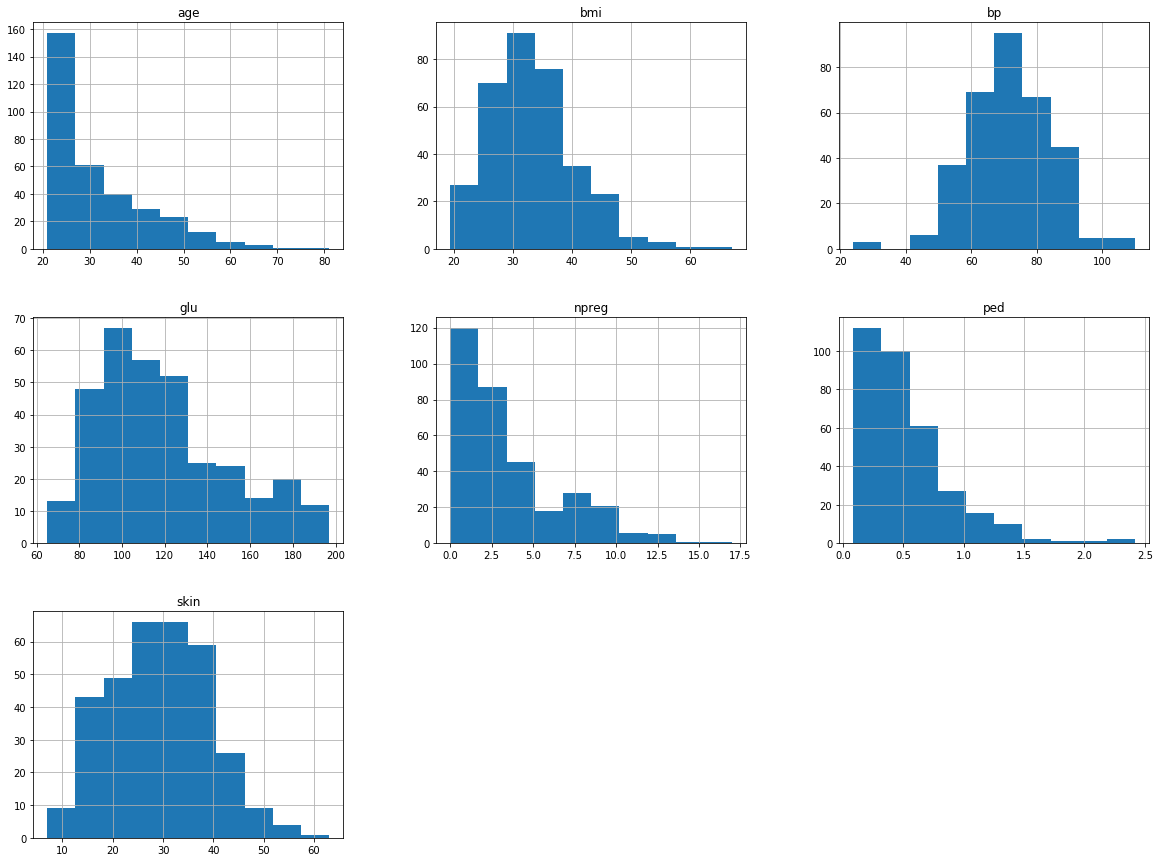

In [390]:
data.hist(figsize=(20,15))
plt.show()

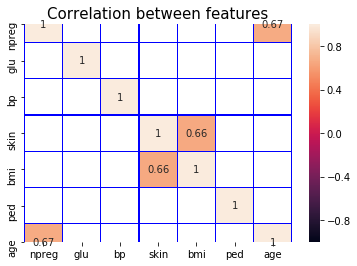

In [391]:
correlation=data.corr()
#plt.figure(figsize=(15,20))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.show()

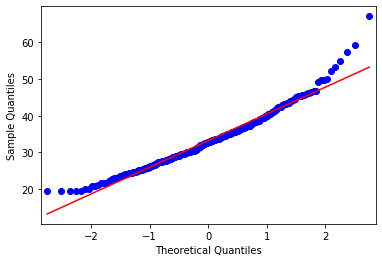

In [392]:
import statsmodels.api as sm
import pylab
#sm.qqplot(data['age'], line='s')
sm.qqplot(data['bmi'], line='s')
#sm.qqplot(data['bp'], line='s')
#sm.qqplot(data['glu'], line='s')
#sm.qqplot(data['npreg'], line='s')
pylab.show()


In [393]:
data.nunique()

npreg     16
glu      107
bp        36
skin      47
bmi      183
ped      289
age       42
type       2
dtype: int64

In [394]:
target=data['type']
target.head()
data=data.drop(['type'],axis=1)
data.head()

,npreg,glu,bp,skin,bmi,ped,age
1,6,148,72,35,33.6,0.627,50
2,1,85,66,29,26.6,0.351,31
3,1,89,66,23,28.1,0.167,21
4,3,78,50,32,31.0,0.248,26
5,2,197,70,45,30.5,0.158,53


In [395]:
#data_1=data_1.drop(['skin'],axis=1)
target.head()

1    Yes
2     No
3     No
4    Yes
5    Yes
Name: type, dtype: object

In [363]:
data.skew()

npreg    1.171401
glu      0.708954
bp      -0.085421
skin     0.236247
bmi      0.805335
ped      1.838795
age      1.393979
dtype: float64

In [364]:
dskew=data.skew()

In [365]:
dskew=dskew[(dskew>0.5)|(dskew<-0.5)]
dskew

npreg    1.171401
glu      0.708954
bmi      0.805335
ped      1.838795
age      1.393979
dtype: float64

In [366]:
data[dskew.index] = np.log1p(data_1[dskew.index])
data['ped']=np.log1p(data_1['ped'])

In [367]:
data.skew()

npreg   -0.677167
glu      0.174051
bp      -0.085421
skin     0.236247
bmi     -0.057890
ped      0.397517
age      0.729309
dtype: float64

In [379]:
#to normalize the variables
from sklearn import preprocessing
data=preprocessing.normalize(data)
data

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.0084402 , 0.75117822, 0.55705351, ..., 0.23716975, 0.00140951,
        0.1772443 ],
       ...,
       [0.06532678, 0.65980048, 0.49648353, ..., 0.21492511, 0.00111709,
        0.41155871],
       [0.03373646, 0.81642223, 0.48580497, ..., 0.17677903, 0.00165309,
        0.20241874],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

In [242]:
#data_log=data_log

In [396]:
target_dummies=pd.get_dummies(target,drop_first=True)

In [397]:
target_dummies

,Yes
1,1
2,0
3,0
4,1
5,1
...,...
328,0
329,1
330,0
331,0


In [398]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data, target_dummies, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (232, 7)
x_test  (100, 7)
y_train  (232, 1)
y_test  (100, 1)


In [399]:
from sklearn.linear_model import LogisticRegressionCV
lr=LogisticRegressionCV()

In [401]:
lr.fit(x_test,y_train)

C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [100, 232]

0.65

In [327]:
y_pred = lr.predict(x_test)

In [328]:
# Making y_pred as DataFrame
predicted_df = pd.DataFrame(y_pred)
predicted_df.head(5)

,0
0,0
1,0
2,0
3,0
4,0
